# 1.1 Import Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys          #시스템 파라미터 접근하는 라이브러리
print("Python version: {}".format(sys.version))

import numpy as np  # 리니어 알제브라 라이브러리
print("Numpy version: {}".format(np.__version__))

import pandas as pd #데이터 프로세싱과 데이터 분석에 필요한 SQL을 사용할 수 있는 라이브러리
print("Pandas version: {}".format(pd.__version__))

import matplotlib   #데이터 시각화를 가능하게 해주는 라이브러리
print("Matplot library version: {}".format(matplotlib.__version__))

import scipy as sp  #numpy에서 조금 더 고급 수학 알고리즘 사용 가능
print("Scipy version: {}".format(sp.__version__))

import IPython
from IPython import display   #데이터 프레임을 조금 더 예쁘게 꾸며주는 라이브러리
print("IPython version : {}".format(IPython.__version__))

import sklearn      #머신 러닝 알고리즘 라이브러리
print("scikit-learn version: {}".format(sklearn.__version__))

#경고 무시
import warnings
warnings.filterwarnings('ignore')
print('-' * 25)

from subprocess import check_output
print(check_output(["ls", "../input/titanic"]).decode("utf8"))
print('-' * 25)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

Python version: 3.6.6 |Anaconda, Inc.| (default, Oct  9 2018, 12:34:16) 
[GCC 7.3.0]
Numpy version: 1.17.4
Pandas version: 0.25.3
Matplot library version: 3.0.3
Scipy version: 1.3.3
IPython version : 7.9.0
scikit-learn version: 0.21.3
-------------------------
gender_submission.csv
test.csv
train.csv

-------------------------


# 1.2 Load Data Modeling Libraries

In [2]:
#모델 알고리즘
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#부수 기능
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection, model_selection, metrics

#데이터 시각화
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#디폴트로 지정
#plot을 주피터 노트북에서 보여주기 위해
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8



# 2.1 Meet and Greet Data

In [3]:
#불러올 데이터를 지정
data_raw = pd.read_csv('../input/titanic/train.csv')

#데이터셋은 3가지로 나누어져있음. train, test, 그리고 validation
#테스트 파일은 마지막 제출 과정에서 사용하기 위함
data_val = pd.read_csv('../input/titanic/test.csv')

#중간에 사용자의 실수로 파일의 데이터를 날리는 것을 방지하기 위해 train파일을 카피해서 사용함
data1 = data_raw.copy(deep = True)

data_cleaner = [data1, data_val]

#데이터 미리보기
print(data_raw.info())
#data_raw.head()     #앞의 데이터를 불러와줌
#data_raw.tail()     #뒤에 있는 데이터 불러옴
data_raw.sample(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
676,677,0,3,"Sawyer, Mr. Frederick Charles",male,24.5,0,0,342826,8.0500,NaN,S
682,683,0,3,"Olsvigen, Mr. Thor Anderson",male,20.0,0,0,6563,9.2250,NaN,S
550,551,1,1,"Thayer, Mr. John Borland Jr",male,17.0,0,2,17421,110.8833,C70,C
229,230,0,3,"Lefebre, Miss. Mathilde",female,NaN,3,1,4133,25.4667,NaN,S
93,94,0,3,"Dean, Mr. Bertram Frank",male,26.0,1,2,C.A. 2315,20.5750,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
260,261,0,3,"Smith, Mr. Thomas",male,NaN,0,0,384461,7.7500,NaN,Q
308,309,0,2,"Abelson, Mr. Samuel",male,30.0,1,0,P/PP 3381,24.0000,NaN,C
588,589,0,3,"Gilinski, Mr. Eliezer",male,22.0,0,0,14973,8.0500,NaN,S


# 2.2 4 C's of Data Cleaning: Correcting, Completing, Creating, and Converting

In [4]:
# 빈 데이터를 출력해줌
print("Train columns with null values:\n", data1.isnull().sum())
print("-" * 10)
print("Test/Validation columns with null values:\n", data_val.isnull().sum())
print("-" * 10)


data_raw.describe(include = 'all')

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Allison, Master. Hudson Trevor",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 2.2-1. Clean Data

In [5]:
###Completing: 빈 데이터를 삭제하거나 채워주기 (train과 test dataset 모두에 적용)
for dataset in data_cleaner:
    #Age : 중앙값으로 채우기
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)
    #Embarked: 가장 많은 빈도로 나온 것으로 채우기
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace=True)
    #fare: 중앙값으로 채우기
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace= True)
    
#칼럼 삭제
drop_column = ['PassengerId', 'Cabin', 'Ticket']
data1.drop(drop_column, axis= 1, inplace=True)

print(data1.isnull().sum())
print("-"* 10)
print(data_val.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
----------
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [6]:
###Create: 데이터 모델링
for dataset in data_cleaner:
    #가족단위로 묶어줌
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    
    #초기화 & 가족 사이즈가 1보다 크면 alone 은 0/No (혼자가 아니란 뜻)로 변경
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0
    
    #데이터에는 긴 이름이 제공되는데, 이름과 Mr, Mrs를 보기 쉽게 나누어주는 작업
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split('.', expand=True)[0]
    
    #cut: 실수 값의 경계선을 지정하는 경우
    #qcut: 갯수가 똑같은 구간으로 나누는 경우
    dataset['FareBin'] = pd.qcut(dataset['Fare'], 4)
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


#Dr, Rev, Col, Mlle, Jonkheer 과 같은 유니크한 이름들 Misc로 통합하여 바꾸어주기
#print(data1['Title'].value_counts())    #전체 종류의 title을 보여줌

#위의 title의 counts로 나오는 것들 중에 10 보다 수가 작은 것들은 Misc로 변경
stat_min = 10
title_names = (data1['Title'].value_counts() < stat_min)
data1['Title'] = data1['Title'].apply(lambda x : 'Misc' if title_names.loc[x] == True else x)
print(data1['Title'].value_counts())
print('-' * 10)

#데이터 미리보기
data1.info()
data_val.info()
data1.sample(10)

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
Survived      891 non-null int64
Pclass        891 non-null int64
Name          891 non-null object
Sex           891 non-null object
Age           891 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Embarked      891 non-null object
FamilySize    891 non-null int64
IsAlone       891 non-null int64
Title         891 non-null object
FareBin       891 non-null category
AgeBin        891 non-null category
dtypes: category(2), float64(2), int64(6), object(4)
memory usage: 85.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null 

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title,FareBin,AgeBin
848,0,2,"Harper, Rev. John",male,28.0,0,1,33.0000,S,2,0,Misc,"(31.0, 512.329]","(16.0, 32.0]"
409,0,3,"Lefebre, Miss. Ida",female,28.0,3,1,25.4667,S,5,0,Miss,"(14.454, 31.0]","(16.0, 32.0]"
560,0,3,"Morrow, Mr. Thomas Rowan",male,28.0,0,0,7.7500,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
701,1,1,"Silverthorne, Mr. Spencer Victor",male,35.0,0,0,26.2875,S,1,1,Mr,"(14.454, 31.0]","(32.0, 48.0]"
500,0,3,"Calic, Mr. Petar",male,17.0,0,0,8.6625,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
237,1,2,"Collyer, Miss. Marjorie ""Lottie""",female,8.0,0,2,26.2500,S,3,0,Miss,"(14.454, 31.0]","(-0.08, 16.0]"
388,0,3,"Sadlier, Mr. Matthew",male,28.0,0,0,7.7292,Q,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"
86,0,3,"Ford, Mr. William Neal",male,16.0,1,3,34.3750,S,5,0,Mr,"(31.0, 512.329]","(-0.08, 16.0]"
17,1,2,"Williams, Mr. Charles Eugene",male,28.0,0,0,13.0000,S,1,1,Mr,"(7.91, 14.454]","(16.0, 32.0]"
212,0,3,"Perkin, Mr. John Henry",male,22.0,0,0,7.2500,S,1,1,Mr,"(-0.001, 7.91]","(16.0, 32.0]"


# 2.2-2.Convert Formats

In [7]:
#새로 변경해주기

label = LabelEncoder()
for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])
    
#타겟 정하기 y 축(우리가 원하는 값 도출 위해)
Target = ['Survived']

# x축 변수들
#이름을 차트로 보기 편하게
data1_x = ['Sex', 'Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']
#데이터의 값들을 자동으로 계산해줌
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare']
data1_xy = Target + data1_x
print('Original X Y: ', data1_xy, '\n')



data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print("Bin X Y: ", data1_xy_bin, '\n')


data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy = data1_dummy.columns.tolist()
data1_xy_dummy = Target + data1_x_dummy
print("Dummy X Y: ", data1_xy_dummy, '\n')
data1_dummy.head() #모두 나누어서 각 승객이 어디에 속하는지 알려줌. 1이 데이터 속 개인이 현재 속하는 곳

Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 

Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_Master', 'Title_Misc', 'Title_Miss', 'Title_Mr', 'Title_Mrs'] 



,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Misc,Title_Miss,Title_Mr,Title_Mrs
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,0,1,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,0,1
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,0,1,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,0,1
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,0,1,0


In [8]:
print('Train columns with null values: \n', data1.isnull().sum())
print("-"*10)
print (data1.info())
print("-"*10)

print('Test/Validation columns with null values: \n', data_val.isnull().sum())
print("-"*10)
print (data_val.info())
print("-"*10)

data_raw.describe(include = 'all')

Train columns with null values: 
 Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
Survived         891 non-null int64
Pclass           891 non-null int64
Name             891 non-null object
Sex              891 non-null object
Age              891 non-null float64
SibSp            891 non-null int64
Parch            891 non-null int64
Fare             891 non-null float64
Embarked         891 non-null object
FamilySize       891 non-null int64
IsAlone          891 non-null int64
Title            891 non-null object
FareBin          891 non-null catego

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Allison, Master. Hudson Trevor",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# 2.2-3. Split Training and Testing Data


In [9]:
train1_x, test1_x, train1_y, test1_y = model_selection.train_test_split(data1[data1_x_calc], data1[Target], random_state = 0)
train1_x_bin, test1_x_bin, train1_y_bin, test1_y_bin = model_selection.train_test_split(data1[data1_x_bin], data1[Target] , random_state = 0)
train1_x_dummy, test1_x_dummy, train1_y_dummy, test1_y_dummy = model_selection.train_test_split(data1_dummy[data1_x_dummy], data1[Target], random_state = 0)

print("Data1 Shape: {}".format(data1.shape))
print("Train1 Shape: {}".format(train1_x.shape))
print("Test1 Shape: {}".format(test1_x.shape))

train1_x_bin.head()


Data1 Shape: (891, 19)
Train1 Shape: (668, 8)
Test1 Shape: (223, 8)


,Sex_Code,Pclass,Embarked_Code,Title_Code,FamilySize,AgeBin_Code,FareBin_Code
105,1,3,2,3,1,1,0
68,0,3,2,2,7,1,1
253,1,3,2,3,2,1,2
320,1,3,2,3,1,1,0
706,0,2,2,4,1,2,1


# 3. Perform Exploratory Analysis with Statistics

In [10]:
#확률적으로 분석해서 생존률 확인
#group by pivot table
for x in data1_x:
    if data1[x].dtype != 'float64':
        print('Survival Correction by: ', x)
        print(data1[[x, Target[0]]].groupby(x, as_index = False).mean())
        print('-'*10, '\n')
        
print(pd.crosstab(data1['Title'], data1[Target[0]]))   #타이틀 별로 생존수 확인

Survival Correction by:  Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Survival Correction by:  Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Survival Correction by:  Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Survival Correction by:  Title
    Title  Survived
0  Master  0.575000
1    Misc  0.444444
2    Miss  0.697802
3      Mr  0.156673
4     Mrs  0.792000
---------- 

Survival Correction by:  SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Survival Correction by:  Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Survival Correction by:  FamilySize
   FamilySize  Survived
0           1  0.303538
1 

# 3-1.배우는 과정이기에 다양한 방법으로 데이터 시각화하기

## Box Plot


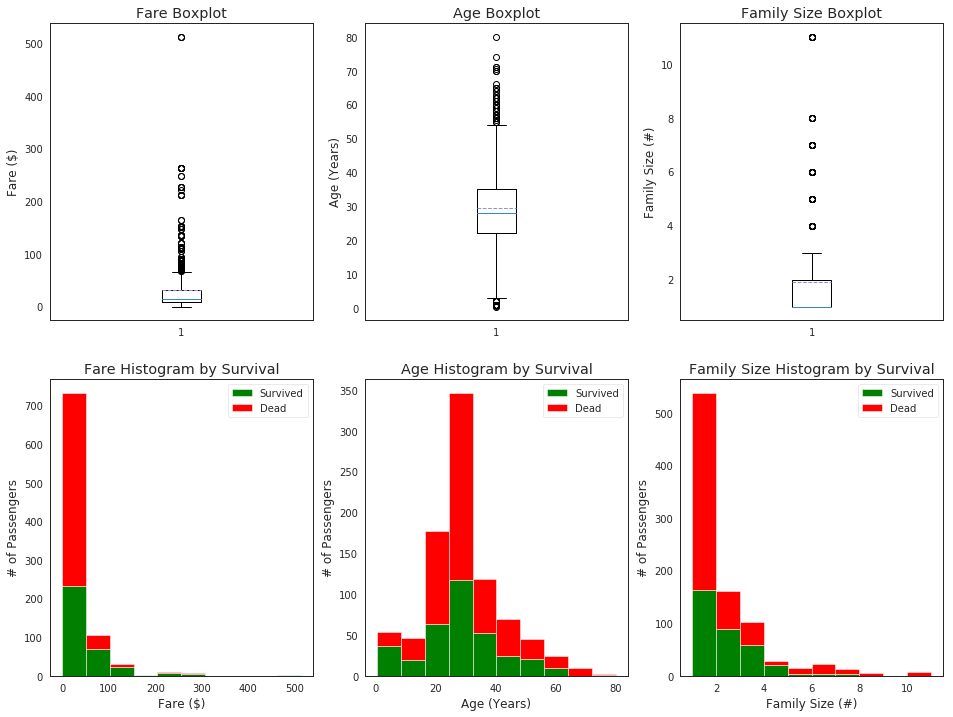

In [11]:
#graph distribution of quantitative data

########이 부분은 박스 그래프
plt.figure(figsize =[16,12])
plt.subplot(231)
plt.boxplot(x=data1['Fare'], showmeans = True, meanline= True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')

plt.subplot(232)
plt.boxplot(data1['Age'], showmeans= True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')

plt.subplot(233)
plt.boxplot(data1['FamilySize'], showmeans=True, meanline= True)
plt.title("Family Size Boxplot")
plt.ylabel('Family Size (#)')

########여기부터는 히스토그램

#Fare별 생존
plt.subplot(234)
plt.hist(x = [data1[data1['Survived']== 1]["Fare"], data1[data1['Survived']==0]['Fare']], stacked = True, color = ['g', 'r'], label=['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare ($)')
plt.ylabel('# of Passengers')
plt.legend()   #바의 상태를 알려줌

#Age별 생존
plt.subplot(235)
plt.hist(x = [data1[data1['Survived']==1]['Age'], data1[data1['Survived']==0]['Age']], stacked=True, color=['g', 'r'], label = ["Survived",'Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('# of Passengers')
plt.legend()

#Family size 별 생존
plt.subplot(236)
plt.hist(x = [data1[data1['Survived']==1]['FamilySize'], data1[data1['Survived']== 0]['FamilySize']], stacked=True, color = ['g','r'], label=['Survived', 'Dead'])
plt.title('Family Size Histogram by Survival')
plt.xlabel('Family Size (#)')
plt.ylabel('# of Passengers')
plt.legend()

## Seaborn 그래프 (Multi-variable 비교에 용이)


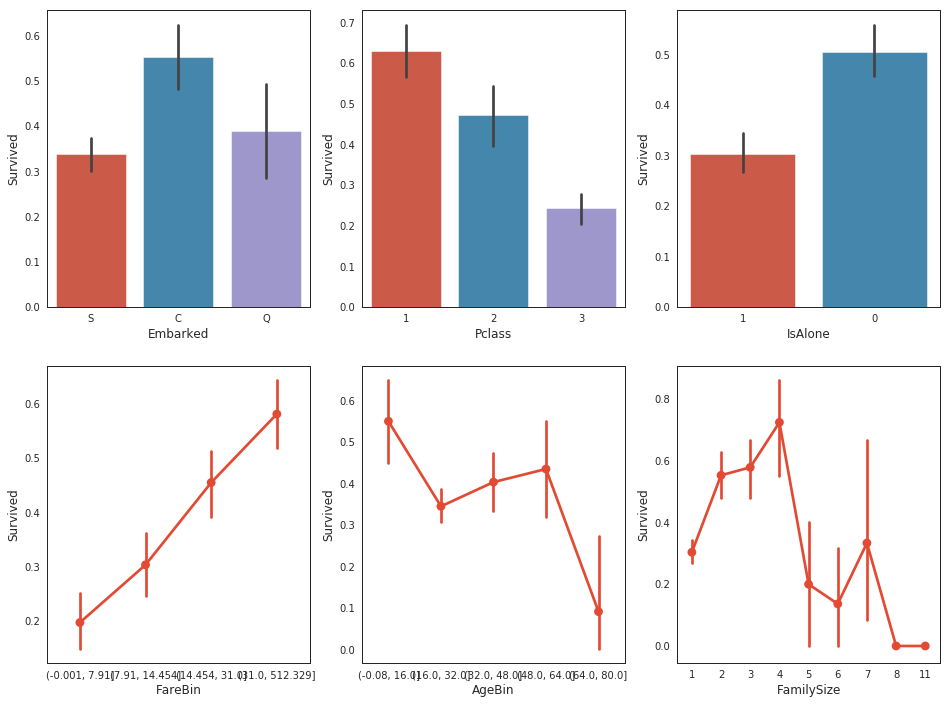

In [12]:
#graph individual features by survival
fig, ax = plt.subplots(2,3, figsize = (16,12))

######여기는 막대 그래프
sns.barplot(x = 'Embarked', y = 'Survived', data= data1, ax = ax[0,0])
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data= data1, ax = ax[0,1])
sns.barplot(x = 'IsAlone', y = 'Survived', order = [1,0], data= data1, ax = ax[0,2])

#####포인트로 그래프 표현
sns.pointplot(x = 'FareBin', y = 'Survived', data= data1, ax = ax[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived', data= data1, ax = ax[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data= data1, ax = ax[1,2])

## 승선의 클래스에 따라 생존여부가 달라지기에 확인

Text(0.5, 1.0, 'Pclass vs FamilySize Survival Comparison')

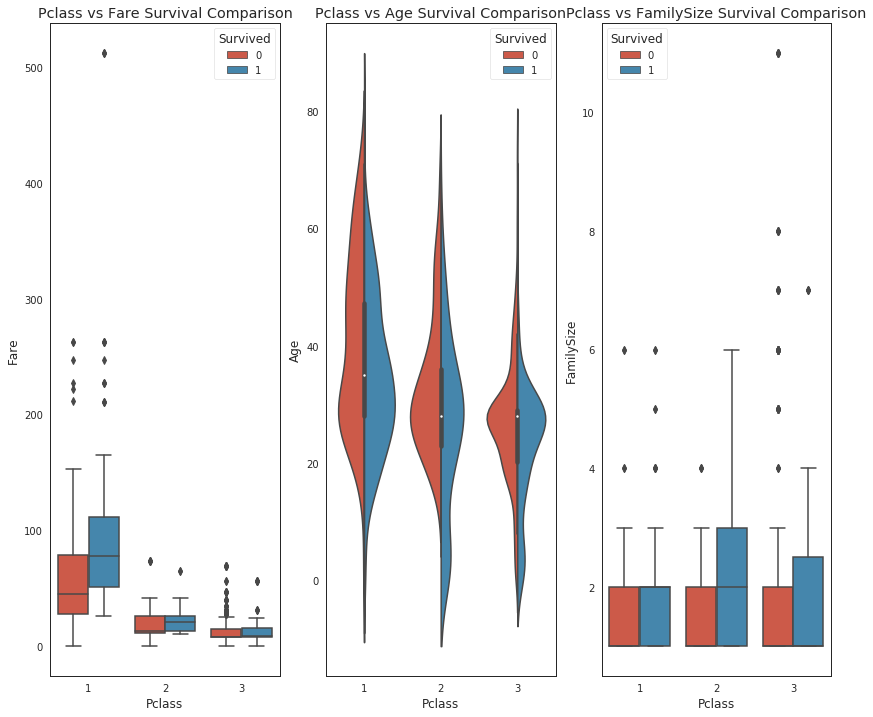

In [13]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(14,12))

sns.boxplot(x = 'Pclass', y='Fare', hue = 'Survived', data= data1, ax = ax1)
ax1.set_title("Pclass vs Fare Survival Comparison")

sns.violinplot(x = 'Pclass', y = "Age", hue='Survived', data= data1, split = True, ax = ax2)
ax2.set_title("Pclass vs Age Survival Comparison")

sns.boxplot(x = 'Pclass', y = 'FamilySize', hue='Survived', data= data1, ax=ax3)
ax3.set_title('Pclass vs FamilySize Survival Comparison')

## 성별로 생존 여부 확인하기 

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

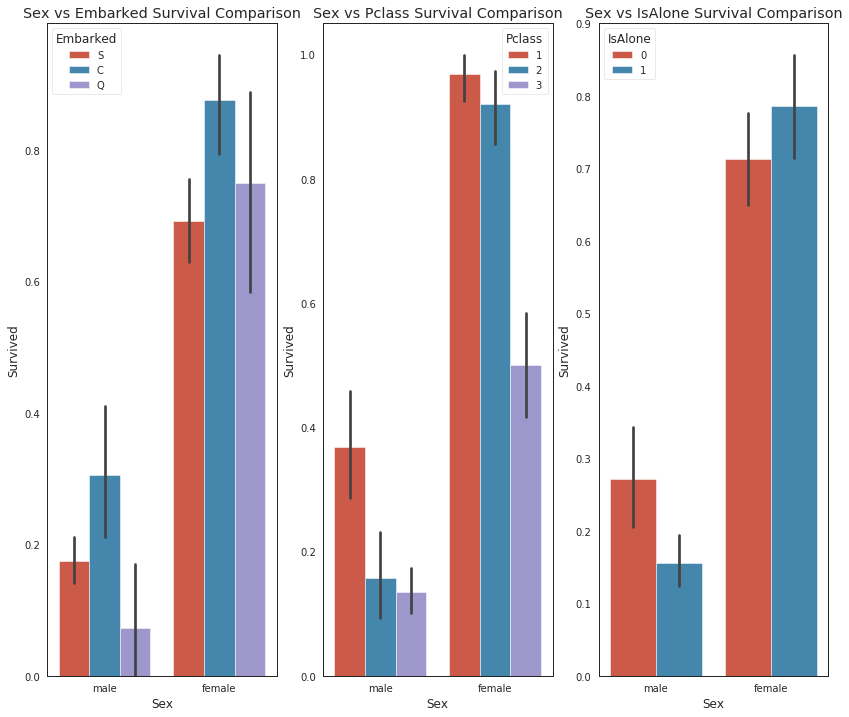

In [14]:
fig, ax = plt.subplots(1,3,figsize= (14,12))

sns.barplot(x = "Sex", y = 'Survived', hue = 'Embarked', data= data1, ax = ax[0])
ax[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x= 'Sex', y = "Survived", hue = 'Pclass', data= data1, ax = ax[1])
ax[1].set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x = 'Sex', y = 'Survived', hue = 'IsAlone', data= data1, ax = ax[2])
ax[2].set_title("Sex vs IsAlone Survival Comparison")

 ## 그 외 비교할 수 있는 그래프들

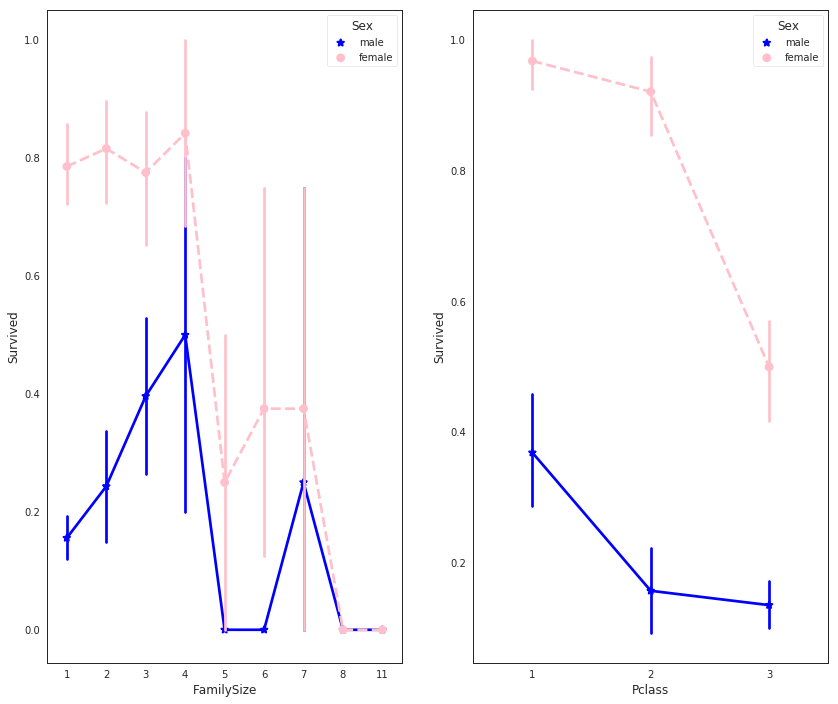

In [15]:
fig, ax = plt.subplots(1,2, figsize = (14,12))

#가족 사이즈에 따른 성별 생존 비교
sns.pointplot(x='FamilySize', y = "Survived", hue="Sex", data= data1, palette={"male": 'blue', 'female': 'pink'}, markers=["*", "o"], linestyles=['-','--'], ax= ax[0])

#승선 클래스에 따른 성별과 생존 비교
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data1,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = ax[1])

## 승선 장소에 따른 비교

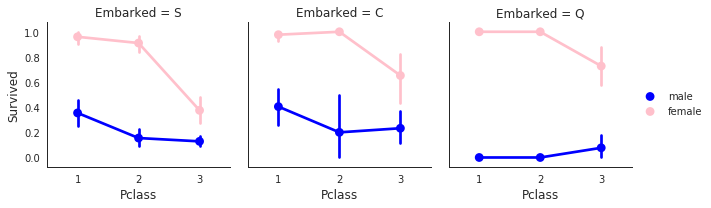

In [16]:
e = sns.FacetGrid(data1, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette={"male": 'blue', 'female': 'pink'})
e.add_legend()

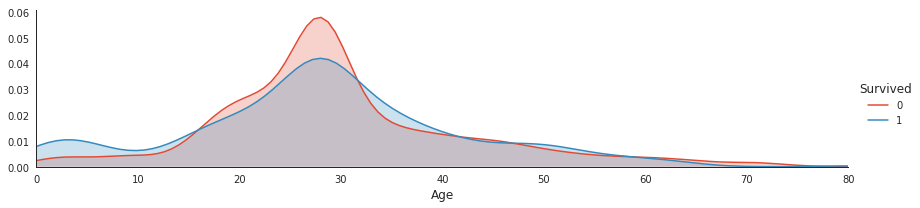

In [17]:
#plot distribution
#나이로 보는 비교
a = sns.FacetGrid(data1, hue='Survived', aspect = 4)
a.map(sns.kdeplot, 'Age', shade = True)
a.set(xlim=(0,data1['Age'].max()))
a.add_legend()

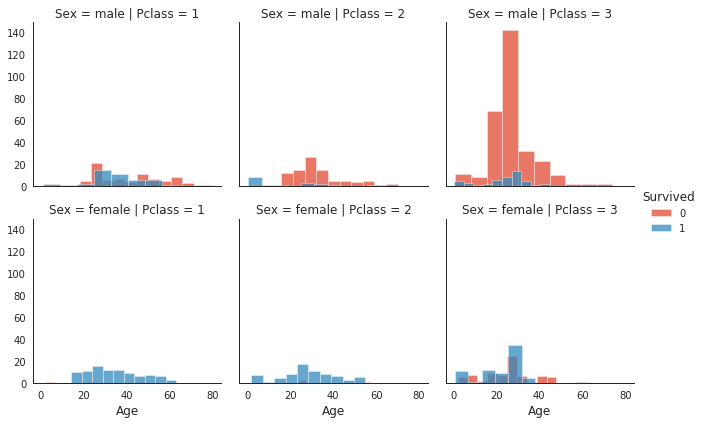

In [18]:
##히스토그램으로 성별과 나이 클래스로 비교
h = sns.FacetGrid(data1, row='Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

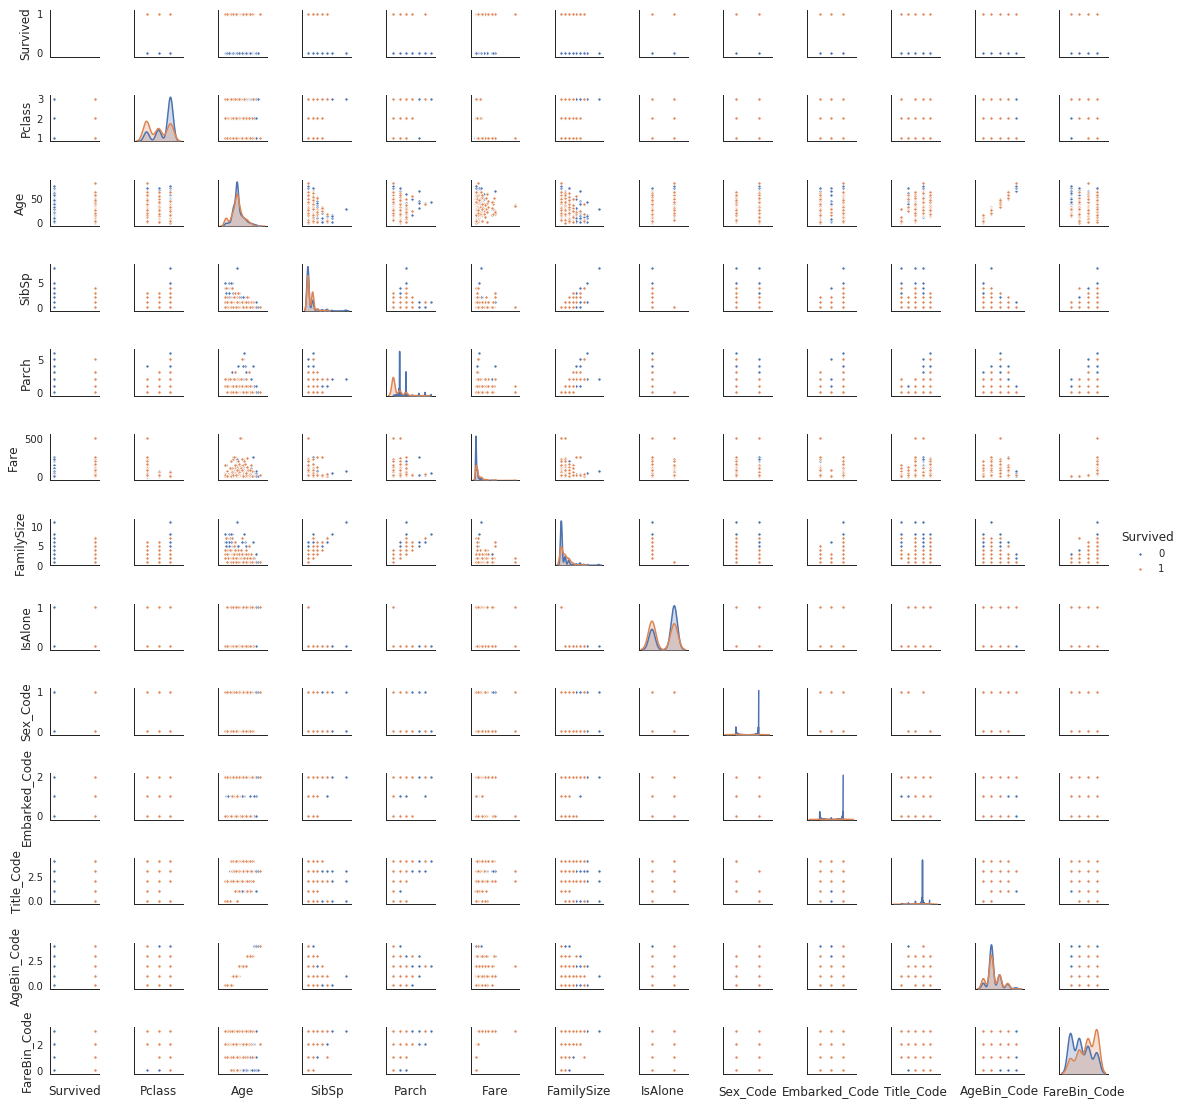

In [19]:
## 전체 데이터 셋에 따른 pair plot
pp = sns.pairplot(data1, hue = 'Survived', palette = 'deep', size=1.2, diag_kind = 'kde', diag_kws=dict(shade=True), plot_kws=dict(s=10) )
pp.set(xticklabels=[])